# Classification Problem

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# read the csv data into python env
df=pd.read_csv('diabetes.csv')

# Data Familiarisation

In [3]:
# display the first 3 rows
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
# display the last 3 rows
df.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Note: The data set is diabetes dataset/ medical data. Our Target column is outcome, It can be 0 or 1. So its a binary classification model.Here we are predicting the chance of diabetes in patients based on other features.

In [5]:
# display the column names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# shape of the data
df.shape

(768, 9)

There are 768 rows & 9 columns in the dataset.

In [7]:
# print the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Note:</br>
1. There are 768 rows & 9 columns in the dataset.</br>
2. There are no null values, but it was told that need to consider 0 as missing value</br>
3. All columns are of numeric type


In [8]:
# display the statistic summary of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Note: we can see that there are outliers in the dataset. In insulin column we can see the effect of high value outliers.

In [9]:
# duplicated rows in the dataset
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


No duplicate rows in the dataset

# Missing value handling

In [10]:
len(df[df['Pregnancies']==0])

111

In [11]:
# check the zero value in dataset
cols=df.columns
missing_values={}

for col in cols:
    missing_values[col]=len(df[df[col]==0])

In [12]:
# missing values in each columns
missing_values

{'Pregnancies': 111,
 'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11,
 'DiabetesPedigreeFunction': 0,
 'Age': 0,
 'Outcome': 500}

In [13]:
# convert dict to list
list(missing_values.items())

[('Pregnancies', 111),
 ('Glucose', 5),
 ('BloodPressure', 35),
 ('SkinThickness', 227),
 ('Insulin', 374),
 ('BMI', 11),
 ('DiabetesPedigreeFunction', 0),
 ('Age', 0),
 ('Outcome', 500)]

Note:</br>
    1. There are zero values in all columns except DiabetesPedigreeFunction & Age columns</br>
    2. We don't need to consider outcome column, Its the target column(binary classification- 0 & 1 indicates the presence or absence)</br>

In [14]:
# Convert the dictionary to a pandas DataFrame
missing_values = pd.DataFrame(list(missing_values.items()), columns=['column_name', 'Count_missing_Values'])
missing_values

,column_name,Count_missing_Values
0,Pregnancies,111
1,Glucose,5
2,BloodPressure,35
3,SkinThickness,227
4,Insulin,374
5,BMI,11
6,DiabetesPedigreeFunction,0
7,Age,0
8,Outcome,500


In [15]:
# calculate missining value %
missing_values["%missing_vals"]=(missing_values['Count_missing_Values']/df.shape[0]) * 100

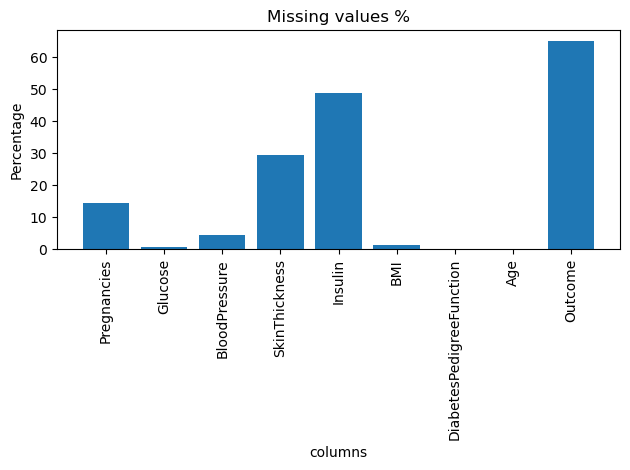

In [16]:
# plot the graph
plt.bar(missing_values["column_name"],missing_values["%missing_vals"])
plt.title('Missing values %')
plt.xlabel('columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()

Note: </br>
    1. There are morethan 40 % missing vaues in insulin column, but we cannot drop those values.our dataset is small & the insulin level is an important feature in prediction.</br>

In [17]:
df['Pregnancies'].nunique()

17

In [18]:
# lets see the unique value count in each column
missing_values["Unique_values"]=missing_values['column_name'].apply(lambda x: df[x].nunique())

In [19]:
# remove the rows-DiabetesPedigreeFunction,Age and Outcome 
missing_values=missing_values[:6]
missing_values

,column_name,Count_missing_Values,%missing_vals,Unique_values
0,Pregnancies,111,14.453125,17
1,Glucose,5,0.651042,136
2,BloodPressure,35,4.557292,47
3,SkinThickness,227,29.557292,51
4,Insulin,374,48.697917,186
5,BMI,11,1.432292,248


In [20]:
# Lets fill the Pregnancy column with its mode(discrete numeric) & rest with its median value

df.loc[df['Pregnancies']==0,'Pregnancies']=df['Pregnancies'].mode()[0]

In [21]:
# Fill the remaining column with its median, all are continous numeric column

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df.loc[df[col]==0,col]=df[col].median()

In [22]:
# verify the missing values have removed or not
cols=df.columns
missing_values={}

for col in cols:
    missing_values[col]=len(df[df[col]==0])
    
missing_values

{'Pregnancies': 0,
 'Glucose': 0,
 'BloodPressure': 0,
 'SkinThickness': 0,
 'Insulin': 0,
 'BMI': 0,
 'DiabetesPedigreeFunction': 0,
 'Age': 0,
 'Outcome': 500}

# Correlation Between Features

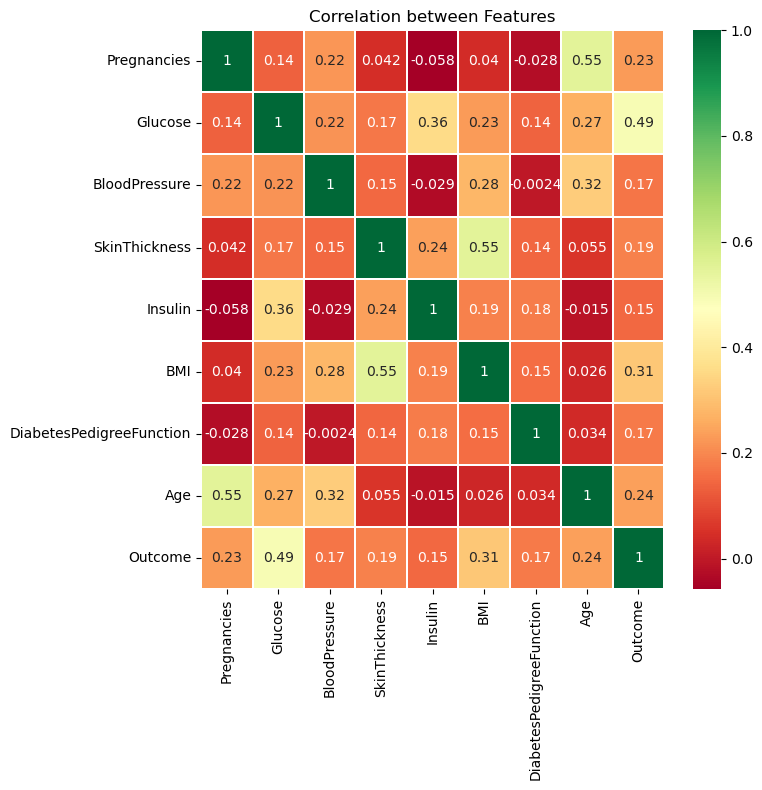

In [23]:
# plot the heatmap to analyze correlation between features
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),linewidths=0.2,cmap='RdYlGn',annot=True)
plt.title('Correlation between Features')
plt.tight_layout()

Note: from the above plot. we can see that there is no strong +ve and -ve correlation between features

# Outlier detection

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,1,137,40,35,168.0,43.1,2.288,33,1


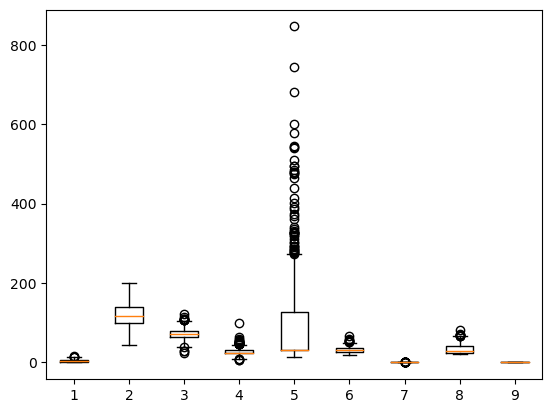

In [25]:
plt.boxplot(df)
plt.show()

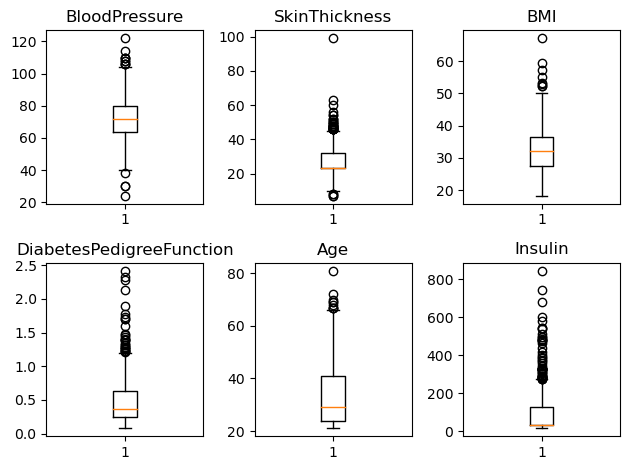

In [26]:
# we need to handle outliers in continuous numerical column
# outliers in Pregnancies, BloodPressure, SkinThickness

plt.subplot(2,3,1)
plt.title('BloodPressure')
plt.boxplot(df['BloodPressure'])
plt.subplot(2,3,2)
plt.title('SkinThickness')
plt.boxplot(df['SkinThickness'])
plt.subplot(2,3,3)
plt.title('BMI')
plt.boxplot(df['BMI'])
plt.subplot(2,3,4)
plt.title('DiabetesPedigreeFunction')
plt.boxplot(df['DiabetesPedigreeFunction'])
plt.subplot(2,3,5)
plt.title('Age')
plt.boxplot(df['Age'])
plt.subplot(2,3,6)
plt.title('Insulin')
plt.boxplot(df['Insulin'])
plt.tight_layout()

Note: Since this is a medical data, we can go for log transformation technique to handle the outlier data

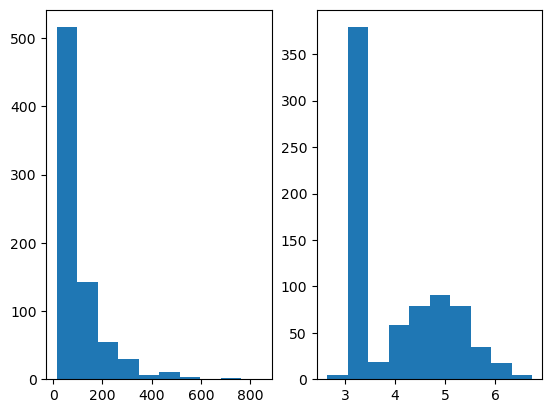

In [27]:
# LOgarithemic Transformation
# Logarithmic transformations can reduce the impact of outliers by compressing the data’s range and bringing extreme values closer to the mean.
# Ensure that all data values are positive, as the logarithm of zero or negative numbers is undefined.
# display the effect of the log transformaton
# If necessary, add a constant to all data points to make them positive
plt.subplot(1,2,1)
plt.hist(df['Insulin'])
plt.subplot(1,2,2)
plt.hist(np.log(df['Insulin']))
plt.show()

Note: Logarithmic transformations can help normalize positively skewed data

In [28]:
# add a constant to DiabetesPedigreeFunction to make them positive
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction']+3

In [29]:
# Lets do the log transformation 
cols=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

for col in cols:
    df[col]=np.log(df[col])

In [30]:
# lets check for -ve values
for cols in df.columns.tolist():
    df_neg = df[df[cols] < 0]
    
df_neg

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


no negative values

In [31]:
df.head(3) # outliers have been handled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,4.997212,4.276666,3.555348,3.417727,3.514526,1.288406,3.912023,1
1,1,4.442651,4.189655,3.367296,3.417727,3.280911,1.209259,3.433987,0
2,8,5.209486,4.158883,3.135494,3.417727,3.148453,1.300736,3.465736,1


Note: we don't need to do the scaling part, because data has been compressed to logarithmic scale

# Encoding

There is no categorical column, so no need for Encoding.

# Scaling

No need to do the scaling part, because data has been compressed to logarithmic scale.

# Modeling

Lets compare the performance of different models.

1. Logistic Regression</br>
2. KNN</br>
3. SVM</br>
4. Naive Bayes</br>
5. DecisionTreeClassifier</br>
6. RandomForestClassifier</br>
7. Adaboost

In [32]:
# import necesary libraries for models & metric eveluation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# f1 score is the harmonic mean of precision & recall
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split

In [33]:
# split data into dependant & independant features
y=df['Outcome']
x=df.drop('Outcome', axis=1)

In [34]:
# split teh data into train & test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
# find the optimum value of k in knn
accuracy_score_k=[]
for i in range(3,15):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accuracy_score_k.append(accuracy_score(y_test,y_pred))

Text(0.5, 1.0, 'Accuracy score vs k')

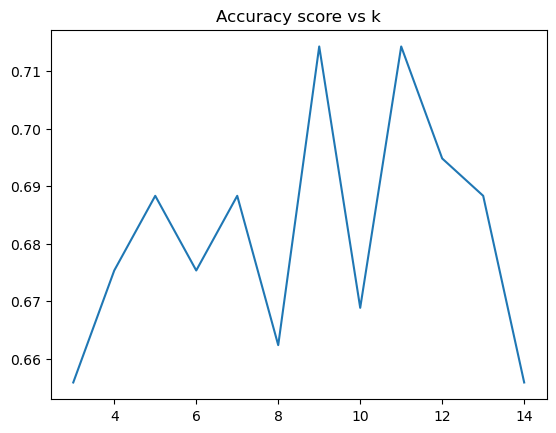

In [36]:
# lets plot the graph to find the k value with high accuracy
plt.plot(range(3,15),accuracy_score_k)
plt.title('Accuracy score vs k')

Note: Optimum value of k is 9

In [37]:
# lets check teh accuracy of SVC using different kernel

svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('kernal_linear :',accuracy_score(y_test,y_pred))

svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('kernal_rbf :',accuracy_score(y_test,y_pred))

svc=SVC(kernel='poly', degree=3)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('kernal_poly degree 3 :',accuracy_score(y_test,y_pred))

svc=SVC(kernel='poly', degree=5)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('kernal_poly degree 5 :',accuracy_score(y_test,y_pred))

kernal_linear : 0.7272727272727273
kernal_rbf : 0.7142857142857143
kernal_poly degree 3 : 0.7727272727272727
kernal_poly degree 5 : 0.7207792207792207


Note: we can see that polynomial with degree 3 performed compared to other

In [38]:
# Decision tree classifier with entropy and gini as criterion
dt=DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print("with entropy",accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))

dt_g=DecisionTreeClassifier(criterion='gini',random_state=42)
dt_g.fit(x_train,y_train)
y_pred=dt_g.predict(x_test)
print("with gini",accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))

with entropy 0.7207792207792207 0.6324786324786325
with gini 0.7142857142857143 0.6271186440677966


Note: we can go for DT with entropy as criterion, becuase it returned high accuracy & f1 score compared to other.

In [39]:
# Radom Forest CLassifier n_estimators as 100 & 200
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))

rf2=RandomForestClassifier(n_estimators=200,random_state=42)
rf2.fit(x_train,y_train)
y_pred=rf2.predict(x_test)
print(accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))

0.7727272727272727 0.6902654867256638
0.7532467532467533 0.6666666666666665


Note: we can go for RF with n_estimators as 100, becuase it returned high accuracy & f1 score compared to other.

In [40]:
# # Radom Forest CLassifier n_estimators as 10 ,20, & 30
ada=AdaBoostClassifier(n_estimators=10,random_state=42)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
print(accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))

ada2=AdaBoostClassifier(n_estimators=20,random_state=42)
ada2.fit(x_train,y_train)
y_pred=ada2.predict(x_test)
print(accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))

ada2=AdaBoostClassifier(n_estimators=30,random_state=42)
ada2.fit(x_train,y_train)
y_pred=ada2.predict(x_test)
print(accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))

0.7662337662337663 0.6785714285714286
0.7727272727272727 0.6788990825688074
0.7597402597402597 0.6605504587155963


Note: we can go for Adaboost with n_estimators as 20, becuase it returned high accuracy & f1 score compared to other.

In [41]:
# create model's object and store it in a list
lr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
gb=GaussianNB()
svc=SVC(kernel='poly', degree=3)
dt=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(n_estimators=100,random_state=42)
ada2=AdaBoostClassifier(n_estimators=20,random_state=42)

models=[lr,gb,knn,svc,dt,rf,ada2]

In [42]:
# a function to calculate the accuracy & f1 score
def predict_var(model_object):
    model_object.fit(x_train,y_train)
    y_pred=model_object.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    return acc,f1

In [43]:
# a dictionary to store the model evaluation score
model_performance={}

In [44]:
# calculating the score for each model
for i in models:
    acc,f1=predict_var(i)
    # extracting the model name
    i=str(i).split('(')[0]
    # store the value
    model_performance[i]=[acc,f1]
    

In [45]:
# performance score for different model
model_performance

{'LogisticRegression': [0.7467532467532467, 0.6355140186915889],
 'GaussianNB': [0.7272727272727273, 0.6440677966101694],
 'KNeighborsClassifier': [0.7142857142857143, 0.5416666666666666],
 'SVC': [0.7727272727272727, 0.6666666666666666],
 'DecisionTreeClassifier': [0.7402597402597403, 0.6551724137931035],
 'RandomForestClassifier': [0.7727272727272727, 0.6902654867256638],
 'AdaBoostClassifier': [0.7727272727272727, 0.6788990825688074]}

In [46]:
# convert the model_performance to df
model_performance_df = pd.DataFrame(model_performance)
# Set the index
model_performance_df.index = ['f1', 'acc']

In [47]:
model_performance_df

,LogisticRegression,GaussianNB,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier
f1,0.746753,0.727273,0.714286,0.772727,0.740260,0.772727,0.772727
acc,0.635514,0.644068,0.541667,0.666667,0.655172,0.690265,0.678899


Note:<br>
    1. By comparing the model performance, Support vector classifier,Random Forest Classifier & AdaBoostClassifier better performed for this dataset. highest accuracy & f1_score observed for  Random Forest Classifier.